In [81]:
%matplotlib inline
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [7]:
# artificial data
np.random.seed(9876789)
nsample = 100
x = np.linspace(0,10,100)
X = np.column_stack((x, x ** 2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

In [14]:
# add an intercept term
# make a target vector y
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [23]:
# fit the regression model
model = sm.OLS(y, X) # OLS(target, data)
results = model.fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.020e+06
Date:                Mon, 07 Mar 2016   Prob (F-statistic):          2.83e-239
Time:                        08:34:02   Log-Likelihood:                -146.51
No. Observations:                 100   AIC:                             299.0
Df Residuals:                      97   BIC:                             306.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.3423      0.313      4.292      0.0

In [25]:
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [27]:
results.params

array([  1.34233516,  -0.04024948,  10.01025357])

In [28]:
results.rsquared

0.9999879365025871

In [30]:
# OLS non-linear curve but linear parameters
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x - 5) ** 2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]

In [31]:
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

In [33]:
# fit and summary
res = sm.OLS(y, X).fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     211.8
Date:                Mon, 07 Mar 2016   Prob (F-statistic):           6.30e-27
Time:                        08:44:10   Log-Likelihood:                -34.438
No. Observations:                  50   AIC:                             76.88
Df Residuals:                      46   BIC:                             84.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.4687      0.026     17.751      0.0

In [34]:
print "Params :", res.params
print "Standard errors :", res.bse
print "Predicted Values :", res.predict()

Params : [ 0.46872448  0.48360119 -0.01740479  5.20584496]
Standard errors : [ 0.02640602  0.10380518  0.00231847  0.17121765]
Predicted Values : [  4.77072516   5.22213464   5.63620761   5.98658823   6.25643234
   6.44117491   6.54928009   6.60085051   6.62432454   6.6518039
   6.71377946   6.83412169   7.02615877   7.29048685   7.61487206
   7.97626054   8.34456611   8.68761335   8.97642389   9.18997755
   9.31866582   9.36587056   9.34740836   9.28893189   9.22171529
   9.17751587   9.1833565    9.25708583   9.40444579   9.61812821
   9.87897556  10.15912843  10.42660281  10.65054491  10.8063004
  10.87946503  10.86825119  10.78378163  10.64826203  10.49133265
  10.34519853  10.23933827  10.19566084  10.22490593  10.32487947
  10.48081414  10.66779556  10.85485568  11.01006072  11.10575781]


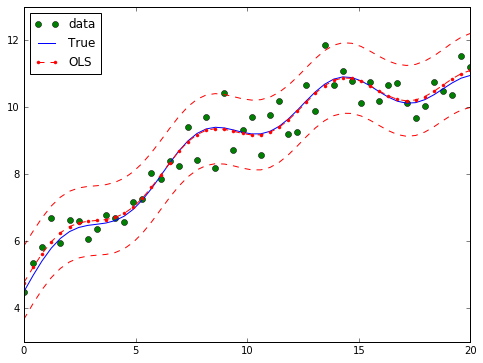

In [54]:
pred_std, var_high, var_low = wls_prediction_std(res)

fix, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'go', label='data')
ax.plot(x, y_true, 'b-', label='True') # X.beta
ax.plot(x, res.fittedvalues, 'r--.', label='OLS')
ax.plot(x, var_high, 'r--')
ax.plot(x, var_low, 'r--')
ax.legend(loc='best')

In [63]:
# OLS with dummy variables
nsample = 50
groups = np.zeros(nsample, int)

groups[20:40] = 1
groups[40:] = 2

dummy = sm.categorical(groups, drop=True)
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, dummy[:, 1:]))
X = sm.add_constant(X, prepend=False)

beta = [1., 3, -3, 10]
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + e

In [67]:
print X[:5, :]
print y[:5]
print groups
print dummy[:5, :]

[[ 0.          0.          0.          1.        ]
 [ 0.40816327  0.          0.          1.        ]
 [ 0.81632653  0.          0.          1.        ]
 [ 1.2244898   0.          0.          1.        ]
 [ 1.63265306  0.          0.          1.        ]]
[  9.28223335  10.50481865  11.84389206  10.38508408  12.37941998]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2]
[[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]]


In [68]:
res2 = sm.OLS(y, X).fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     211.8
Date:                Mon, 07 Mar 2016   Prob (F-statistic):           6.30e-27
Time:                        09:17:24   Log-Likelihood:                -34.438
No. Observations:                  50   AIC:                             76.88
Df Residuals:                      46   BIC:                             84.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.4687      0.026     17.751      0.0

In [87]:
pred_std, var_high, var_low = wls_prediction_std(res2)

fix, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'go', label='data')
ax.plot(x, y_true, 'b-', label='True') # X.beta
ax.plot(x, res2.fittedvalues, 'r--.', label='Predicted')
ax.plot(x, var_high, 'r--')
ax.plot(x, var_low, 'r--')
ax.legend(loc='best')

NameError: name 'res2' is not defined

### Trying my hand at Time Series

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [46]:
data = pd.read_csv('AirPassengers.csv')
print data.head()

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [47]:
print 'Data Types:'
print data.dtypes

Data Types:
Month          object
#Passengers     int64
dtype: object


In [48]:
dateparse = lambda dates : pd.datetime.strptime(dates, '%Y-%m')
# converts the data into time series data.
# reading the date as a timestamp by parsing the dates properly.
data = pd.read_csv('AirPassengers.csv', parse_dates='Month', index_col='Month', date_parser=dateparse)
# parse_dates : the target column on which to apply the lambda
# index_col : which index of the data is the time dimension

In [49]:
print data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name=u'Month', length=144, freq=None)


In [50]:
print data.dtypes

#Passengers    int64
dtype: object


In [51]:
ts = data['#Passengers']

In [52]:
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [53]:
ts['1949-01-01']

112

In [54]:
ts[:'1949-09-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
Name: #Passengers, dtype: int64

Stationary time series are better than non-stationary ones.
A TS is stationary if it has constant statistical properties over time:
* Constant Mean
* Constant Variance
* Autocovariance that does not depend on time

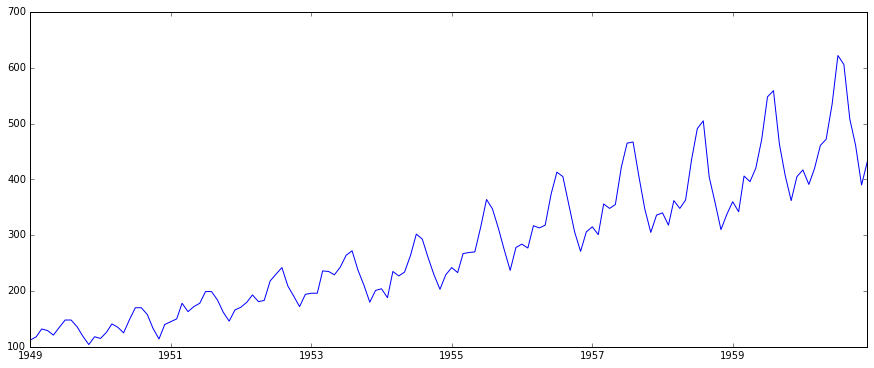

In [55]:
plt.plot(ts)

In [56]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    # Determine rolling statistics - moving average and std
    # here window is 12 for number of months to compute rolling stats over
    # in the case of stock prediction, I will roll on 30 days
    rollmean = pd.rolling_mean(timeseries, window=12)
    rollstd = pd.rolling_std(timeseries, window=12)
    
    # Plot rolling statistics:
    orig = plt.plot(timeseries, 'b-', label='Original')
    mean = plt.plot(rollmean, 'r--', label='Rolling Mean')
    std = plt.plot(rollstd, 'g--', label='Rolling STD')
    plt.legend(loc='best')
    plt.title('Rolling mean & STD')
    
    # Perform Dickey Fuller Test:
    print 'Results of Dickey - Fuller Test'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags used', 'No. of observations used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

Results of Dickey - Fuller Test
Test Statistic                0.815369
p-value                       0.991880
#Lags used                   13.000000
No. of observations used    130.000000
Critical Value (5%)          -2.884042
Critical Value (1%)          -3.481682
Critical Value (10%)         -2.578770
dtype: float64


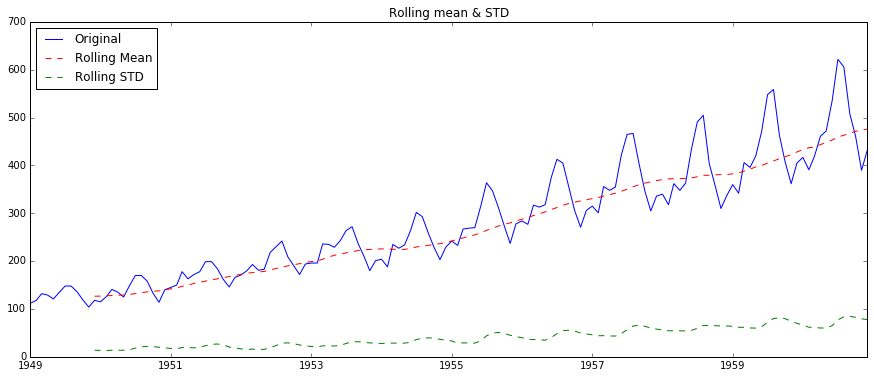

In [57]:
test_stationarity(ts)

This time series is non-stationary, as it clearly has an increasing trend. Now, to make it stationary.  
There are 2 reasons why a time series can be non-stationary:
* Trend: Varying mean over time (a general trend over time)
* Seasonality: Intra time frame variations (shorts sell more in summer)

Main principle is to model these trends and seasonal factors and then remove them from the series. Then do some forecasting stuff on the series, and add these origin shifts back.  
Very much the same principle as affine linear classifiers and homogenous linear classifiers.

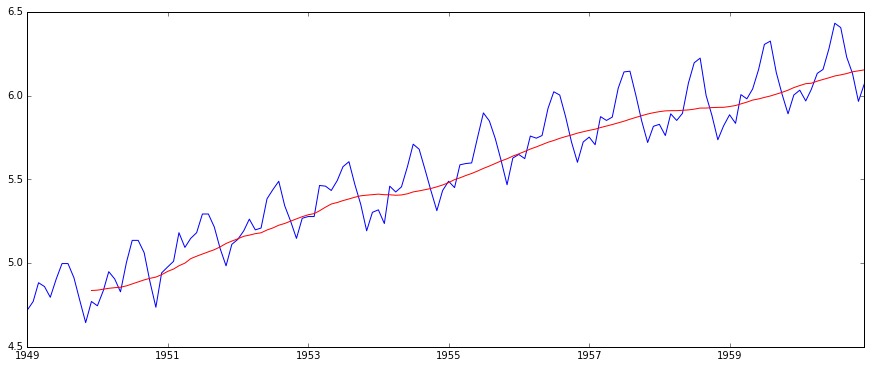

In [58]:
ts_log = np.log(ts)
moving_avg = pd.rolling_mean(ts_log, 12)
plt.plot(ts_log)
plt.plot(moving_avg, 'r-')

In [59]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

In [60]:
ts_log_moving_avg_diff.dropna(inplace=True)

In [61]:
ts_log_moving_avg_diff.head()

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

Results of Dickey - Fuller Test
Test Statistic               -3.162908
p-value                       0.022235
#Lags used                   13.000000
No. of observations used    119.000000
Critical Value (5%)          -2.886151
Critical Value (1%)          -3.486535
Critical Value (10%)         -2.579896
dtype: float64


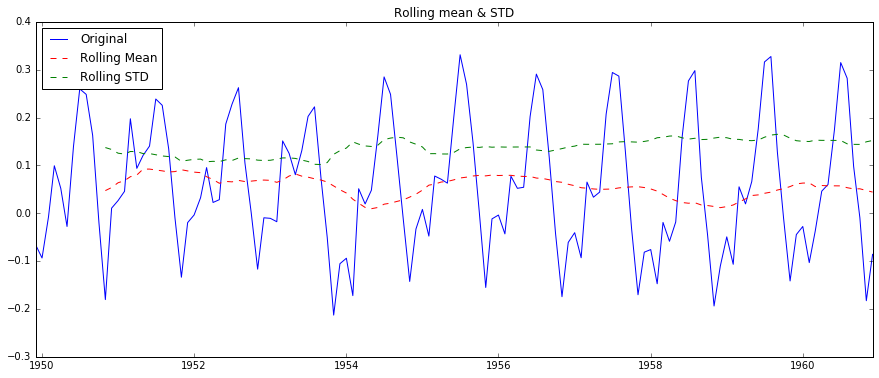

In [62]:
test_stationarity(ts_log_moving_avg_diff)

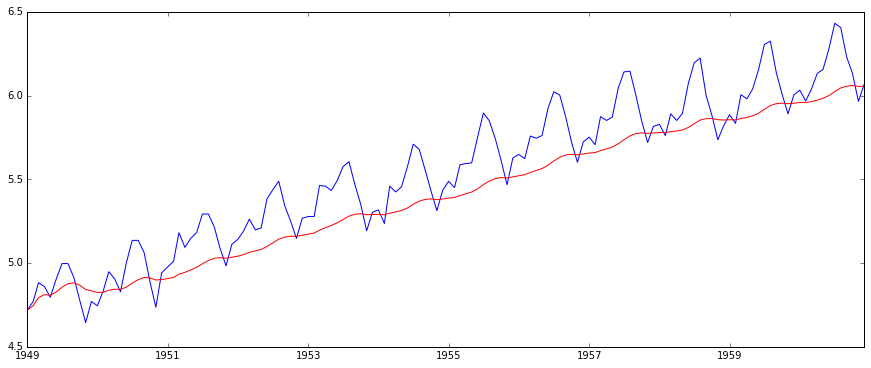

In [63]:
expweighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
# ewma works even with no previous values because it assigns weights to all the values
# halflife is a parameter that tells the rate of exponential decay
# ie., give paramters that are 12 months older half the weight of the current data point
# in stock prediction, since i have daily data, I can keep half-life to 30 maybe, give previous month's data less weight
# or 90, to consider 3 months' data more important
plt.plot(expweighted_avg, 'r-')

Results of Dickey - Fuller Test
Test Statistic               -3.601262
p-value                       0.005737
#Lags used                   13.000000
No. of observations used    130.000000
Critical Value (5%)          -2.884042
Critical Value (1%)          -3.481682
Critical Value (10%)         -2.578770
dtype: float64


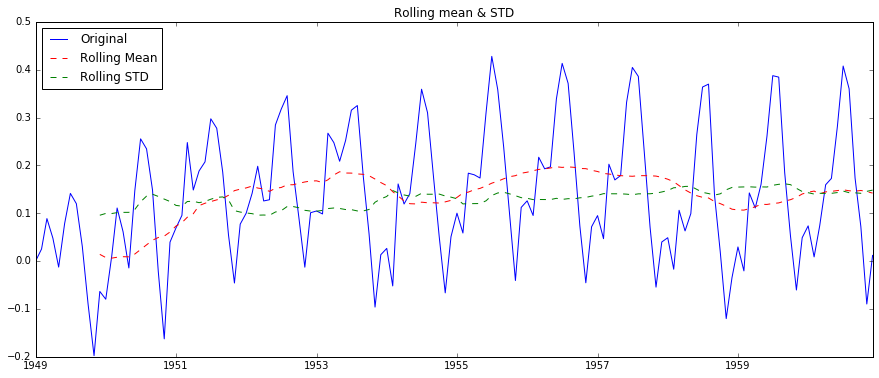

In [64]:
ts_log_ewma_avg_diff = ts_log - expweighted_avg
test_stationarity(ts_log_ewma_avg_diff)

### Eliminating Trend and seasonality
2 main ways to do this:
* Differencing - remove particular time lag
* Decomposition - model the trend and seasonality, then remove it from the model
    * Add it back to a prediction after fitting the prediction according to the stationary time series

Results of Dickey - Fuller Test
Test Statistic               -2.717131
p-value                       0.071121
#Lags used                   14.000000
No. of observations used    128.000000
Critical Value (5%)          -2.884398
Critical Value (1%)          -3.482501
Critical Value (10%)         -2.578960
dtype: float64


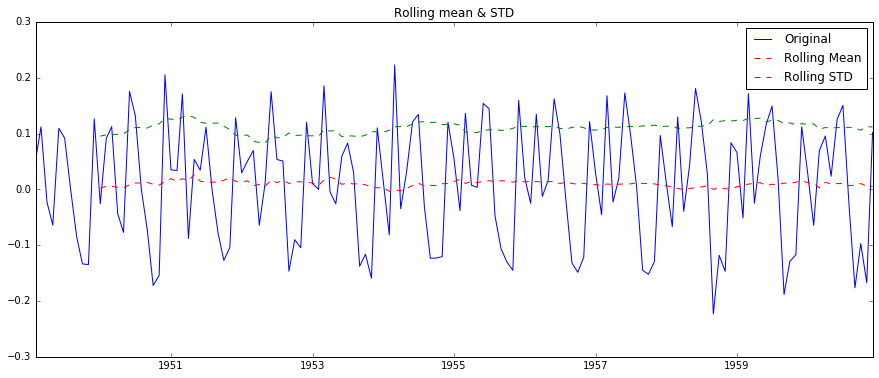

In [65]:
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

Removing first order time lag makes data stationary with 90% confidence

Results of Dickey - Fuller Test
Test Statistic             -8.196629e+00
p-value                     7.419305e-13
#Lags used                  1.300000e+01
No. of observations used    1.280000e+02
Critical Value (5%)        -2.884398e+00
Critical Value (1%)        -3.482501e+00
Critical Value (10%)       -2.578960e+00
dtype: float64


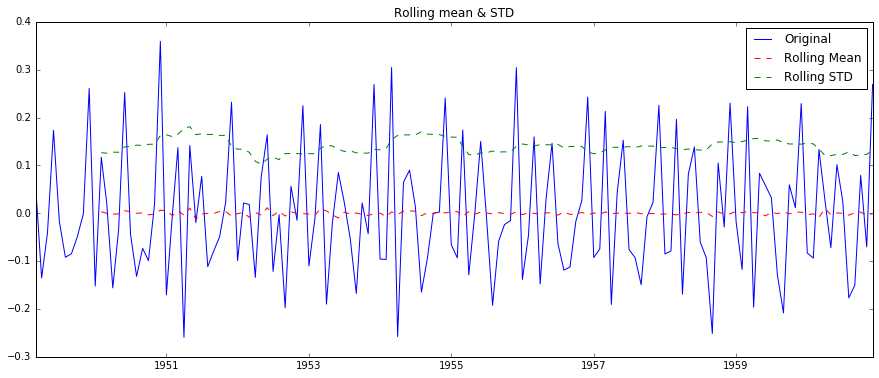

In [66]:
ts_log_diff2 = ts_log_diff - ts_log_diff.shift()
ts_log_diff2.dropna(inplace=True)
test_stationarity(ts_log_diff2)

Taking second order differences makes the time series almost completely stationary. 

### Next Approach: Decomposition
Model the trend and seasonality and remove it from the model.  
Add it back when making a prediction

In [67]:
# Statsmodels is so cool if this works
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

In [68]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

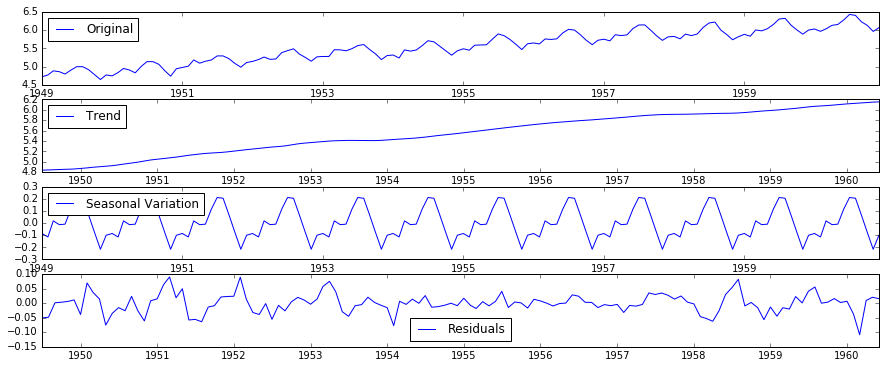

In [69]:
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal Variation')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

In [70]:
ts_log_decompose = residual

In [71]:
ts_log_decompose.dropna(inplace=True)

Results of Dickey - Fuller Test
Test Statistic             -6.332387e+00
p-value                     2.885059e-08
#Lags used                  9.000000e+00
No. of observations used    1.220000e+02
Critical Value (5%)        -2.885538e+00
Critical Value (1%)        -3.485122e+00
Critical Value (10%)       -2.579569e+00
dtype: float64


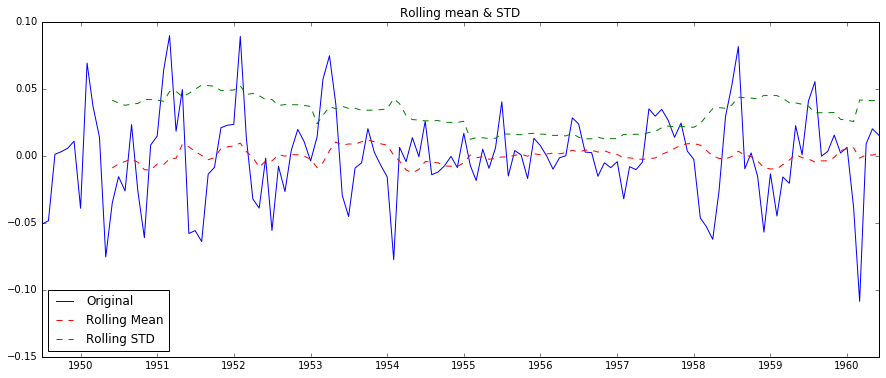

In [72]:
test_stationarity(ts_log_decompose)

Since we have removed the upward trend (very similar to the moving average) and the seasonal variation, now the time series obtained is very nice and standardized.  
If we fit any model to this time series, we can add the trend vector and the seasonal variation vector and the proper prediction (or so I presume). That's in the next part:

### Forecasting a Time Series: (This is most important for me)

#### ARIMA: Auto-Regressive Integrated Moving Averages
Linear regression for time series data.  
Predictors depend on the parameters (p,d,q) of the ARIMA model.  
* p -> number of AR terms
* q -> number of MA terms
* d -> number of differencers

Next important question:  
How to choose the values of p and q.  
Use 2 plots to find this:
* Autocorrelation Function (ACF): measure of correlation between the TS and a lagged version of itself.
* Partial Autocorrelation Function (PACF): measure of correlation between the TS and a lagged version of itself after eliminating variations already explained by the intervening comparisons. Not too clear on this.  
Its something like:
* when comparing the variation caused by lag of 5, first remove everything until lag 5. So only see the variation of the 5th previous entry on the current entry, without including the variations of the first 4. Even if they are dependent. Treat each lagged index independently.    

In [84]:
# Computing ACF and PACF plots
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

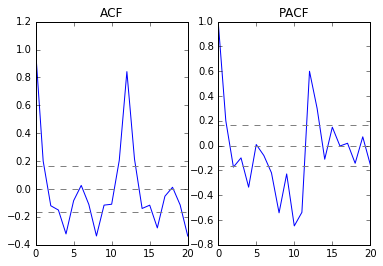

In [86]:
# Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
# 95% of normal distribution lies between -1.96 to 1.96
# 95% confidence interval
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('ACF')

# Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
# 95% of normal distribution lies between -1.96 to 1.96
# 95% confidence interval
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('PACF')